# TC1002S Herramientas computacionales: el arte de la analítica

This is a notebook with all your work for the final evidence of this course


# Niveles de dominio a demostrar con la evidencia

### SING0202A

Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.


# Student information

- Name: Marisol Rodríguez Mejía

- ID: A01640086

- My carreer: ITC


# Importing libraries

In [3]:
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# PART 1
# Use your assigned dataset

In [2]:
# Define where you are running the code: colab or local
RunInColab          = True     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

else:
    # Define path del proyecto
    Ruta            = ""

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## A1 Load data

In [4]:
url = Ruta + "datasets/A01640086.csv"
df = pd.read_csv(url)

## A2 Data managment


Print the first 7 rows

In [6]:
df.head(7)

,Unnamed: 0,x1,x2
0,0,-0.651854,0.565605
1,1,0.123377,1.043726
2,2,0.469727,0.836234
3,3,0.032707,0.473639
4,4,0.854605,0.646451
5,5,1.815734,0.229342
6,6,-0.253257,0.907183


Print the first 4 last rows

In [5]:
df.tail(4)

,Unnamed: 0,x1,x2
1796,1796,0.058201,0.123785
1797,1797,0.886349,0.506972
1798,1798,1.880795,0.244915
1799,1799,2.003297,0.427839


How many rows and columns are in your data?

Use the `shape` method


In [8]:
print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])

Number of rows: 1800
Number of columns: 3


Print the name of all columns 

Use the `columns` method

In [9]:
df.columns

Index(['Unnamed: 0', 'x1', 'x2'], dtype='object')

What is the data type in each column

Use the `dtypes` method 

In [10]:
df.dtypes

Unnamed: 0      int64
x1            float64
x2            float64
dtype: object

What is the meaning of rows and columns?

In [ ]:
# The rows represent the observations in our data, which in this case represent values for x1 and x2. The columns represent those 2 variables.

Print a statistical summary of your columns


In [11]:
df.describe()

,Unnamed: 0,x1,x2
count,1800.00000,1800.000000,1800.000000
mean,899.50000,0.502621,0.248948
std,519.75956,0.868574,0.498505
min,0.00000,-1.238466,-0.703688
25%,449.75000,-0.060800,-0.204963
50%,899.50000,0.499840,0.237693
75%,1349.25000,1.079877,0.687771
max,1799.00000,2.196111,1.244663


1) What is the minumum and maximum values of each variable




**Variable 1:**
min = 0
max = 1799

**Variable 2:**
min = -1.238466
max = 2.196111

**Variable 3:**
min = -0.703688
max = 1.244663

---



2) What is the mean and standar deviation of each variable


**Variable 1:**
519.75956

**Variable 2:**
0.868574

**Variable 3:**
0.498505

---

3) What the 25%, 50% and 75% represent?
They represent the first 3 quartiles of our data

Rename the columns using the same name with capital letters

In [ ]:
df.columns.values[1] = 'X1'
df.columns.values[2] = 'X2'

Rename the columns to their original names

In [82]:
df.columns.values[1] = 'x1'
df.columns.values[2] = 'x2'

Use two different alternatives to get one of the columns

In [5]:
df.iloc[:,-1]

0       0.565605
1       1.043726
2       0.836234
3       0.473639
4       0.646451
          ...   
1795    0.645813
1796    0.123785
1797    0.506972
1798    0.244915
1799    0.427839
Name: x2, Length: 1800, dtype: float64

In [6]:
df['x2']

0       0.565605
1       1.043726
2       0.836234
3       0.473639
4       0.646451
          ...   
1795    0.645813
1796    0.123785
1797    0.506972
1798    0.244915
1799    0.427839
Name: x2, Length: 1800, dtype: float64

Get a slice of your data set: second and thrid columns and rows from 62 to 72

In [24]:
df.iloc[62:73, 1:3]

,x1,x2
62,0.213176,0.849439
63,-0.284166,0.903374
64,-0.253319,1.040368
65,-0.884553,0.545882
66,0.896189,0.690316
67,-0.940785,0.304416
68,1.975759,0.177643
69,0.140821,0.768065
70,-0.858495,0.421620
71,1.989865,0.338419


For the second and thrid columns, calculate the number of null and not null values and verify that their sum equals the total number of rows

In [34]:
sum1 = df[['x1', 'x2']].isnull().sum()
sum1

x1    0
x2    0
dtype: int64

In [35]:
sum2 = df[['x1', 'x2']].notnull().sum()
sum2

x1    1800
x2    1800
dtype: int64

In [40]:
sum1 + sum2 == df.shape[0]

x1    True
x2    True
dtype: bool

Discard the first column


In [8]:
df = df.drop(df.columns[0], axis=1)

### Questions 

Based on the previos results, provide a description of yout dataset

Your response:




My dataset consists of 1800 observations and 2 variables, it doesn't contain any null values. It also looks like our data doesn't have any categorical values, they are all numerical (float).

## A3 Data visualization

Plot in the same figure the histogram of the two variables

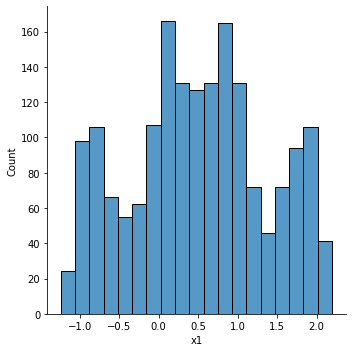

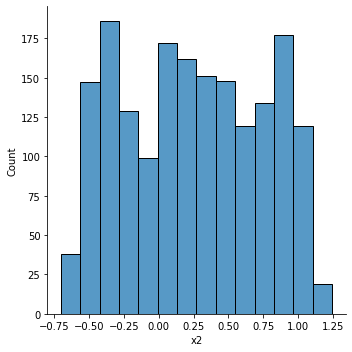

In [44]:
sns.displot(df['x1'], kde = False)
sns.displot(df['x2'], kde = False)

plt.show()

Based on this plots, provide a description of your data:

Your response here:

The values are between -0.75 and 3, they have several variations.

Plot in the same figure the boxplot of the two variables 

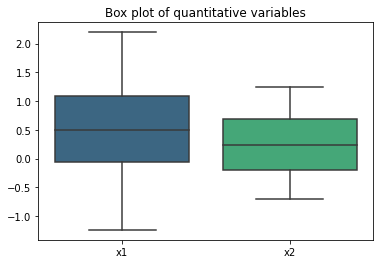

In [45]:
X = df.loc[:, ['x1', 'x2']]
x2bp = sns.boxplot(data=X, orient="v", palette="viridis")
x2bp.set_title("Box plot of quantitative variables")
plt.show()

Scatter plot of the two variables

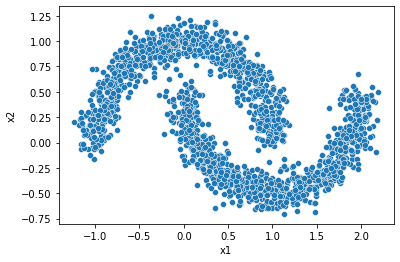

In [47]:
sns.scatterplot(data = df, x = 'x1', y = 'x2')
plt.show()

### Questions 

Based on the previos plots, provide a description of yout dataset

Your response:




As seen on the boxplots, my dataset has no outliers. It also looks like it could be divided into two clusters.

## A4 Kmeans

Do Kmeans clustering assuming a number of clusters accorging to your scatter plot

In [49]:
K = 2
km = KMeans(n_clusters=K, n_init="auto")

yestimated = km.fit_predict(df)
yestimated

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

Add to your dataset a column with the assihned cluster to each data point

In [50]:
df['yestimated'] = yestimated

Print the number associated to each cluster

In [51]:
df.yestimated.unique()

array([1, 0], dtype=int32)

Print the centroids

In [52]:
km.cluster_centers_

array([[ 1.19498506, -0.07216986],
       [-0.20216244,  0.57582572]])

Print the intertia metric

In [53]:
km.inertia_

736.9872239926983

Plot a scatter plot of your data assigned to each cluster. Also plot the centroids

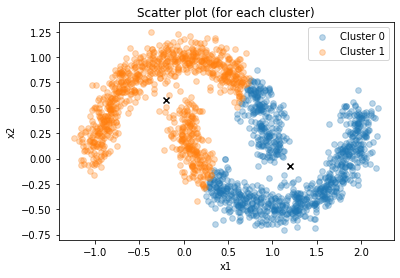

In [54]:
df1 = df[df.yestimated==0]
df2 = df[df.yestimated==1]

plt.scatter(df1.x1, df1.x2, label='Cluster 0', marker='o', s=32, alpha=0.3)
plt.scatter(df2.x1, df2.x2, label='Cluster 1', marker='o', s=32, alpha=0.3)

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='x')

plt.title('Scatter plot (for each cluster)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

### Questions 

Provides a detailed description of your results

Your response:

It looks like selecting 2 clusters was the right choice, the results show our data and its respective cluster. From the centroids, we can observe that it is almost evenly devided, the blue cluster having a bit more points.

## A5 Elbow plot

Compute the Elbow plot

In [55]:
sse = []

# Define values of k
k_rng = range(1,5)

# For each k
for k in k_rng:
  # Create model
  km = KMeans(n_clusters=k, n_init="auto")
  # Do K-means clustering
  km.fit_predict(df)
  # Save sse for each k
  sse.append(km.inertia_)

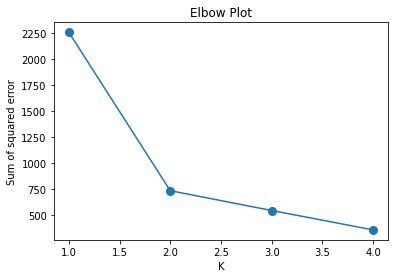

In [56]:
plt.plot(k_rng, sse, 'o-', markersize=8)

plt.title('Elbow Plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

### Questions 

**What is the best number of clusters K? (argue your response)**

**Your response:**




The best number is 2. As we can see in the elbow plot, theres a clear threshold at (2, 750).

**Does this number of clusters agree with your inital guess? (argue your response)**

**Your response:**

Yes, my initial guess was also 2. I observed that the data concentrated on two different areas.

# PART 2
# Create a dataset and do clustering

1) Generate some data using the "make_blobs" function from "sklearn.datasets"

- The number of observations is equal to the three last digits in your ID (if this number is lower than 99, then multiply it by ten)

- 3 variables

- 4 clusters

- Standar deviation of each cluster of 1.5



In [9]:
x, y = make_blobs(n_samples=860, n_features=3, centers=4, cluster_std=1.5, random_state=42)

2) Plot the scatter plot of your data using the real cluster labels

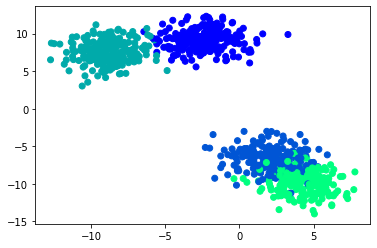

In [10]:
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='winter')
plt.show()

3) Do K means clustering 

In [11]:
K = 4
km = KMeans(n_clusters=K, n_init="auto").fit(x)
yestimated = km.fit_predict(x)

4) Plot the scatter plot of your data using the estimated cluster labels

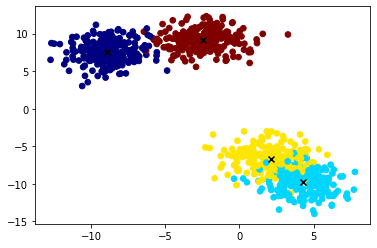

In [13]:
plt.scatter(x[:,0], x[:,1], c = yestimated, s = 32, cmap='jet')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='x')
plt.show()

### Questions 

Provides a detailed description of your results.

Your response:

The scatter plot shows clearly our 4 clusters. What caught my eye is that they overlap and there are points that look closer to centroids of different color, which could be a visualization error when plotting the points.

# PART 3
# Descipcion de tu percepcion del nivel de desarrollo de la subcompetencia 

### SING0202A Interpretación de variables


Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Interpreta interacciones**. Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo.

**Tu respuesta:**

Puedo encontrar sentido en las interacciones entre variables, entendiendo cómo diferentes variables en un problema pueden afectarse entre sí y cómo contribuyen al resultado. Por consiguiente, considero que cumplo con la subcompetencia.

Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Construcción de modelos**. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.

**Tu respuesta:**

Gracias a las herramientas de Python, fui capaz de generar modelos a partir de una base de datos, en este caso involucrando las variables de x1 y x2.